In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
import seaborn as sns

In [304]:
raw_data = sns.load_dataset('titanic')  # import한 seaborn으로부터 titanic 가져오기
raw_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [305]:
print(raw_data.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [306]:
clean_data = raw_data.dropna(axis=1, thresh=500)  # null이 500 이상인 컬럼 날려버리기 deck 말하는 거임
print(clean_data.columns)  # deck 컬럼이 사라진 것을 확인할 수 있음

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [307]:
mean_age = clean_data['age'].mean()  # 나이 평균
print(mean_age)

29.69911764705882


In [308]:
clean_data['age'].fillna(mean_age, inplace=True)  # age 컬럼의 NaN에 평균 나이로 채워주고 데이터 저장
clean_data.head()

C:\anaconda3\envs\DL_exam_37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [309]:
clean_data.drop(['embark_town', 'alive'], axis=1, inplace=True)
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB
None


C:\anaconda3\envs\DL_exam_37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [310]:
clean_data['embarked'].fillna(method='ffill', inplace=True)
print(clean_data.isnull().sum())

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64


C:\anaconda3\envs\DL_exam_37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [311]:
clean_data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alone'],
      dtype='object')

In [312]:
list(clean_data.columns)

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'alone']

In [313]:
label = list(clean_data.columns)  # column들을 리스트화해주고
keep = label.pop(0)  # 리스트화한 컬럼들의 0인덱스꺼 pop하고
target = clean_data[[keep]]
training_data = clean_data[label]

print(target.head())
print(training_data.head())

   survived
0         0
1         1
2         1
3         1
4         0
   pclass     sex   age  sibsp  parch     fare embarked  class    who  \
0       3    male  22.0      1      0   7.2500        S  Third    man   
1       1  female  38.0      1      0  71.2833        C  First  woman   
2       3  female  26.0      0      0   7.9250        S  Third  woman   
3       1  female  35.0      1      0  53.1000        S  First  woman   
4       3    male  35.0      0      0   8.0500        S  Third    man   

   adult_male  alone  
0        True  False  
1       False  False  
2       False   True  
3       False  False  
4        True   True  


In [314]:
value_data = training_data[['age', 'fare']]
value_data  # 원래는 print(value_data) 해야돼요~~ 알지??

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [315]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_date = scaler.fit_transform(value_data)
value_data = pd.DataFrame(scaled_date, columns=value_data.columns)
print(value_data)
value_data.describe()  # 표준화 잘 되었는지 체크~

          age      fare
0   -0.592481 -0.502445
1    0.638789  0.786845
2   -0.284663 -0.488854
3    0.407926  0.420730
4    0.407926 -0.486337
..        ...       ...
886 -0.207709 -0.386671
887 -0.823344 -0.044381
888  0.000000 -0.176263
889 -0.284663 -0.044381
890  0.177063 -0.492378

[891 rows x 2 columns]


,age,fare
count,8.910000e+02,8.910000e+02
mean,2.562796e-16,-4.373606e-17
std,1.000562e+00,1.000562e+00
min,-2.253155e+00,-6.484217e-01
25%,-5.924806e-01,-4.891482e-01
50%,0.000000e+00,-3.573909e-01
75%,4.079260e-01,-2.424635e-02
max,3.870872e+00,9.667167e+00


In [316]:
training_data.drop(['age', 'fare'], axis=1, inplace=True)

C:\anaconda3\envs\DL_exam_37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [317]:
onehot_data = pd.get_dummies(training_data, columns=training_data.columns)
print(onehot_data.head())

   pclass_1  pclass_2  pclass_3  sex_female  sex_male  sibsp_0  sibsp_1  \
0         0         0         1           0         1        0        1   
1         1         0         0           1         0        0        1   
2         0         0         1           1         0        1        0   
3         1         0         0           1         0        0        1   
4         0         0         1           0         1        1        0   

   sibsp_2  sibsp_3  sibsp_4  ...  class_First  class_Second  class_Third  \
0        0        0        0  ...            0             0            1   
1        0        0        0  ...            1             0            0   
2        0        0        0  ...            0             0            1   
3        0        0        0  ...            1             0            0   
4        0        0        0  ...            0             0            1   

   who_child  who_man  who_woman  adult_male_False  adult_male_True  \
0          0   

In [318]:
training_data = pd.concat((onehot_data, value_data), axis=1)
training_data

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,...,class_Third,who_child,who_man,who_woman,adult_male_False,adult_male_True,alone_False,alone_True,age,fare
0,0,0,1,0,1,0,1,0,0,0,...,1,0,1,0,0,1,1,0,-0.592481,-0.502445
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0.638789,0.786845
2,0,0,1,1,0,1,0,0,0,0,...,1,0,0,1,1,0,0,1,-0.284663,-0.488854
3,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0.407926,0.420730
4,0,0,1,0,1,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0.407926,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,1,-0.207709,-0.386671
887,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,-0.823344,-0.044381
888,0,0,1,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0.000000,-0.176263
889,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,1,-0.284663,-0.044381


In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(training_data, target, test_size=0.2)
# 매 epochs마다 과적합하는지 등 체크하려고 시험문제제출용 데이터 따로 떼어두는 셈?
# 데이터가 많으면 10%정도만 떼어놔도 될 것 같음
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(712, 34) (712, 1)
(179, 34) (179, 1)


In [320]:
# 모델을 만들어 봅시다
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout  # 드롭아웃 누구세요? 초면입니다..

In [321]:
model = Sequential()
model.add(Dense(128, input_dim=34, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(1, activation='sigmoid'))
# 이렇게 여러층? 쌓는 정도는 적절히 감으로 하는 것이라고 합니다..
# 해보고 최적의 모델을 쓰면된다고.. 하다보면 대충 감이 온다고.....?
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 128)               4480      
_________________________________________________________________
dropout_42 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_43 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_44 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)              

In [322]:
# 애기 공부환경? 설정해주고
model.compile(loss='mse', optimizer='adam', metrics=['binary_accuracy'])
# 기계육아 교육지도 시작합니다..
fit_hist = model.fit(X_train, Y_train,
                     batch_size=50, epochs=10,
                     validation_split=0.2, verbose=1)

Epoch 1/10
12/12 [==============================] - 0s 12ms/step - loss: 0.2046 - binary_accuracy: 0.7381 - val_loss: 0.1292 - val_binary_accuracy: 0.8252
Epoch 2/10
12/12 [==============================] - 0s 4ms/step - loss: 0.1415 - binary_accuracy: 0.7961 - val_loss: 0.1326 - val_binary_accuracy: 0.8462
Epoch 3/10
12/12 [==============================] - 0s 4ms/step - loss: 0.1314 - binary_accuracy: 0.8260 - val_loss: 0.1417 - val_binary_accuracy: 0.7832
Epoch 4/10
12/12 [==============================] - 0s 4ms/step - loss: 0.1285 - binary_accuracy: 0.8330 - val_loss: 0.1284 - val_binary_accuracy: 0.8392
Epoch 5/10
12/12 [==============================] - 0s 4ms/step - loss: 0.1224 - binary_accuracy: 0.8401 - val_loss: 0.1312 - val_binary_accuracy: 0.8112
Epoch 6/10
12/12 [==============================] - 0s 4ms/step - loss: 0.1226 - binary_accuracy: 0.8260 - val_loss: 0.1340 - val_binary_accuracy: 0.8252
Epoch 7/10
12/12 [==============================] - 0s 4ms/step - loss: 0.1

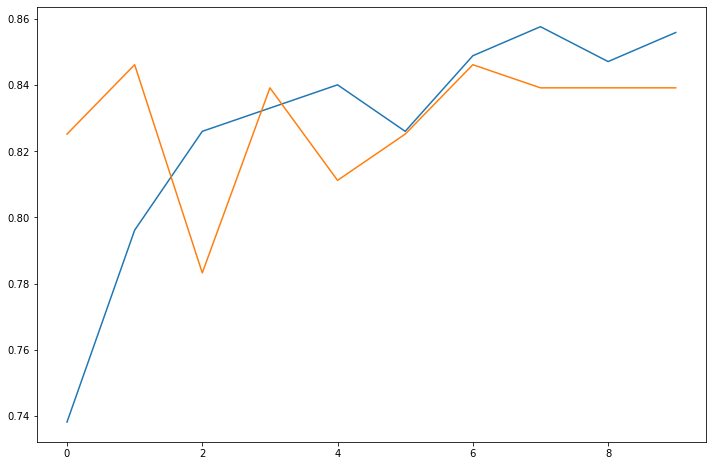

In [323]:
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])
plt.show()

# 애기 학습평가 숙지도 확인할게요
# 그래프 확인하고 과적합이 일어나는 것 같으면 학습 횟수를 좀 줄여주는 게 좋아요~
# 30번으로 시작했는데 애가 덜떨어지기 시작하고 답만 외우기 시작해서 .. 10번으로 줄였습니다..

In [324]:
score = model.evaluate(X_train, Y_train, verbose=0)
print('loss :', score[0])
print('accuracy :', score[1])

loss : 0.11305418610572815
accuracy : 0.8539325594902039


값을 예측하는 거, 분류하는 거 ==> 크게 두 종류?
분류하는 거 : 로지스틱 회귀
값 예측 : 회귀?